In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [2]:
def rxn1(Y,Z):
    Ccb, Cch4b, Ccob, Cco2b, Ch2b, Ch2ob, Cce, Cch4e, Ccoe,  Cco2e, Ch2e, Ch2oe = Y
    sph = 0.82 # no unit typical value
    diaparticle = 0.0004 # m woodchips particle diameter 400um
    g = 9.18 # m/s^2
    rhobedmat = 2960 # kg/m^3
    rhogas = 1.2 # kg/m^3
    viscosity = 4.9 * 10 ** -5 # Pa s
    diameterbed = 4 # m
    h = 1 # m 
    alpha = 0.4 # Typical value unitless
    rhoc = 2960 # kg/m^3
    T = 1073 # K
    biomass = 2.6 # kg/s
    uo = 2 # m/s
    Kbc = 2 # Typical Value s^-1
    Kce = 1 # Typical Value s^-1

    epsmf = (0.071 / sph) ** (1 / 3)
    Ac = 3.14 / 4 * diameterbed # m^2
    Fc = biomass * 0.09

    umf = ((sph * diaparticle) ** 2) * g * (rhobedmat - rhogas) * (epsmf ** 3) / (1 - epsmf) / 150 / viscosity # m/s
    dbm = 0.652 * (Ac * (uo - umf)) ** 0.4 # m
    dbo = 0.00376 * (uo - umf) ** 2 # m
    db = dbm - ((dbm - dbo) * np.exp(-0.3 * h / diameterbed)) # m
    ub = uo - umf + (0.71 * (g * db) ** (1 / 2)) # m/s
    ubr = 0.71 * (g * db) ** (1 / 2) # m/s
    gamma = (uo - umf) / ub # unitless
    us = Fc / rhoc / Ac # m/s
    ue = umf / epsmf - us # m/s
    ms = 200 * uo * 12.011
    Kbe = 2/3
    
    r1f = 1.272 * ms * T * np.exp(-22645 / T) * Ch2oe # mol/m3.s
    r1r = 1.044 * (10 ** (-4)) * ms * T ** 2 * np.exp((-6319 / T) - 17.29) * Ch2e * Ccoe

    r2f = 1.272 * ms * T * np.exp(-22645 / T) * Cco2e
    r2r = 1.044 * 10 ** (-4) * ms * T ** 2 * np.exp(-2363 / T - 20.92) * Ccoe ** 2

    r3f = 1.368 * (10 ** (-3)) * ms * T * np.exp(-8078 / T - 7.087) * Ch2e
    r3r = 0.151 * ms * (T ** 0.5) * np.exp(-13578 / T - 0.372) * Cch4e ** 0.5

    r4f = 7.68 * (10 ** 2) * ms* T * np.exp(-36640 / T) * Ccoe ** 0.5 * Ch2oe
    r4r = 6.4 * (10 ** 1) * ms* T * np.exp(-39260 / T) * Ch2e ** 0.5 * Cco2e

    r5f = 3.1005 * np.exp(-15000 / T) * Cch4e * Ch2oe
    r5r = 3.556 * (10 ** (-3)) * T * np.exp(-15000 / T) * Ccoe * Ch2e ** 2
    
    dCcbdz = (-Kbe * (Ccb - Cce)) / ub # Bubble Mass Balance
    
    dCch4bdz = (-Kbe * (Cch4b - Cch4e)) / ub
    

    dCcobdz = (-Kbe * (Ccob - Ccoe)) / ub
    

    dCco2bdz = (-Kbe * (Cco2b - Cco2e)) / ub
    

    dCh2bdz = (-Kbe * (Ch2b - Ch2e)) / ub
    

    dCh2obdz = (-Kbe * (Ch2ob - Ch2oe)) / ub
    
    """

    dCccdz = (Kbc * (Ccb - Ccc) - Kce * (Ccc - Cce)) / (ub * gamma * (((3 * umf / epsmf) / (ubr - (umf - epsmf))) + alpha)) # Clouds Mass Balance
    

    dCch4cdz = (Kbc * (Cch4b - Cch4c) - Kce * (Cch4c - Cch4e)) / (ub * gamma * (((3 * umf / epsmf) / (ubr - (umf - epsmf))) + alpha))
    

    dCcocdz = (Kbc * (Ccob - Ccoc) - Kce * (Ccoc - Ccoe)) / (ub * gamma * (((3 * umf / epsmf) / (ubr - (umf - epsmf))) + alpha))
    

    dCco2cdz = (Kbc * (Cco2b - Cco2c) - Kce * (Cco2c - Cco2e)) / (ub * gamma * (((3 * umf / epsmf) / (ubr - (umf - epsmf))) + alpha))
    

    dCh2cdz = (Kbc * (Ch2b - Ch2c) - Kce * (Ch2c - Ch2e)) / (ub * gamma * (((3 * umf / epsmf) / (ubr - (umf - epsmf))) + alpha))
    

    dCh2ocdz = (Kbc * (Ch2ob - Ch2oc) - Kce * (Ch2oc - Ch2oe)) / (ub * gamma * (((3 * umf / epsmf) / (ubr - (umf - epsmf))) + alpha))
    """

    dCcedz = (Kbe * (Ccb - Cce) - (-r1f + r1r - r2f + r2r - 0.5 * r3f + 0.5 * r3r)) / (ue / gamma * (1 - gamma - alpha * gamma)) / 1000 # Emulsion Phase Assuming only reactions takes place in emulsion phase
    

    dCch4edz = (Kbe * (Cch4b - Cch4e) - (0.5 * r3f - 0.5 * r3r - r5f + r5r)) / (ue / gamma * (1 - gamma - alpha * gamma)) / 1000
    

    dCcoedz = (Kbe * (Ccob - Ccoe) - (r1f - r1r + 2 * r2f - 2 * r2r - r4f + r4r + r5f - r5r)) / (ue / gamma * (1 - gamma - alpha * gamma)) / 1000
    

    dCco2edz = (Kbe * (Cco2b - Cco2e) - (-r2f + r2r + r4f - r4r)) / (ue / gamma * (1 - gamma - alpha * gamma)) / 1000
    

    dCh2edz = (Kbe * (Ch2b - Ch2e) - (r1f - r1r - r3f + r3r + r4f - r4r + 3 * r5f - 3 * r5r)) / (ue / gamma * (1 - gamma - alpha * gamma)) / 1000
    

    dCh2oedz = (Kbe * (Ch2ob - Ch2oe) - (-r1f + r1r - r4f + r4r - r5f + r5r)) / (ue / gamma * (1 - gamma - alpha * gamma)) / 1000
    

    return [dCcbdz, dCch4bdz, dCcobdz, dCco2bdz, dCh2bdz, dCh2obdz, dCcedz, dCch4edz, dCcoedz, dCco2edz, dCh2edz, dCh2oedz]

Text(0,0.5,'C(mol/m3)')

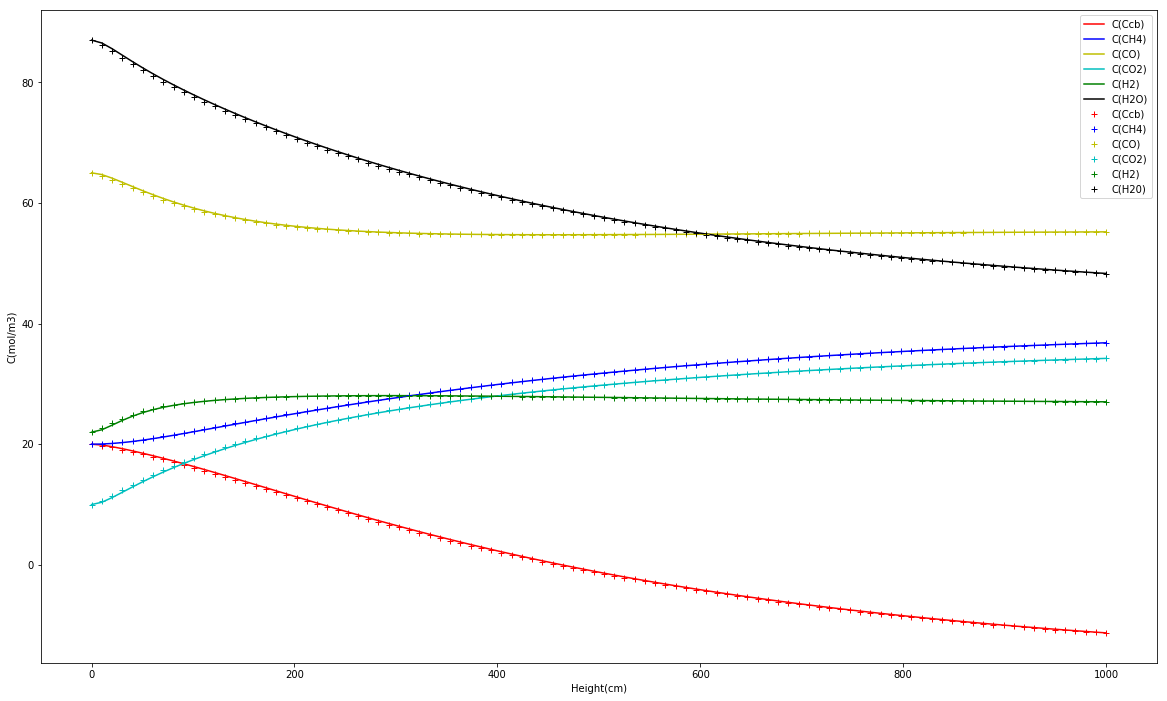

In [3]:
z0 = np.linspace(0,1000,100)
Y0 = [20, 20, 65, 10, 22, 87, 20, 20, 65, 10, 22, 87]
y=odeint(rxn1, Y0, z0)

dCcbdz = y[:,0]
dCch4bdz = y[:,1]
dCcobdz = y[:,2]
dCco2bdz = y[:,3]
dCh2bdz = y[:,4]
dCh2obdz = y[:,5]
dCcedz = y[:,6]
dCch4edz = y[:,7]
dCcoedz = y[:,8]
dCco2edz = y[:,9]
dCh2edz = y[:,10]
dCh2oedz = y[:,11]

plt.figure(figsize=(20,12))
plt.plot(z0,dCcbdz, "r-", label="C(Ccb)")
plt.plot(z0,dCch4bdz, "b-", label="C(CH4)")
plt.plot(z0,dCcobdz, "y-", label="C(CO)")
plt.plot(z0,dCco2bdz, "c-", label="C(CO2)")
plt.plot(z0,dCh2bdz, "g-", label="C(H2)")
plt.plot(z0,dCh2obdz, "k-", label="C(H2O)")
plt.plot(z0,dCcedz, "r+", label="C(Ccb)")
plt.plot(z0,dCch4edz, "b+", label="C(CH4)")
plt.plot(z0,dCcoedz, "y+", label="C(CO)")
plt.plot(z0,dCco2edz, "c+", label="C(CO2)")
plt.plot(z0,dCh2edz, "g+", label="C(H2)")
plt.plot(z0,dCh2oedz, "k+", label="C(H20)")

plt.legend()
plt.xlabel("Height(cm)")
plt.ylabel("C(mol/m3)")